In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target.astype(float) 
print(X.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [29]:
df = pd.DataFrame(X)
df["PRICE"] = y
print(df.head())
corr_matrix = df.corr(numeric_only=False)
corr_with_price = corr_matrix["PRICE"].abs().sort_values(ascending=False)
print(corr_with_price)

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  
PRICE      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64


In [30]:
df = df[["RM", "LSTAT"]] # ستون‌های 5 و 12 
feature_names = [boston.feature_names[5], boston.feature_names[12]]
print(df.head())

      RM  LSTAT
0  6.575   4.98
1  6.421   9.14
2  7.185   4.03
3  6.998   2.94
4  7.147   5.33


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(20, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


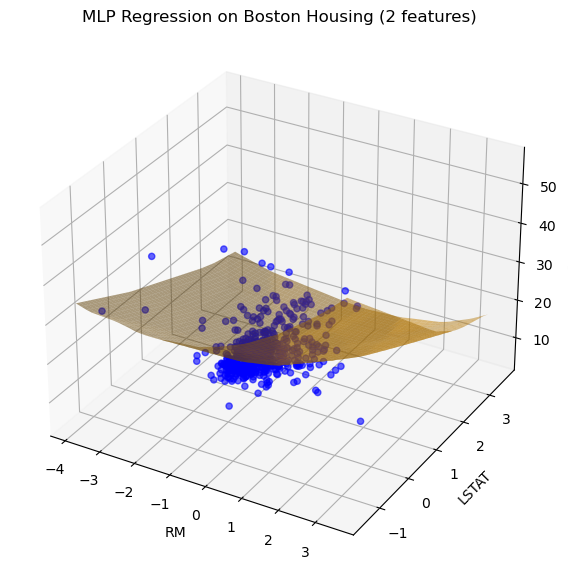

In [36]:
X_scaled = scaler.transform(df)
x1_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 50)
x2_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 50)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# --- 6. پیش‌بینی مقادیر ---
y_pred = model.predict(grid)
yy_pred = y_pred.reshape(xx1.shape)

# --- 7. رسم نمودار سه‌بعدی ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# نقاط واقعی
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, c='blue', label='Actual data', alpha=0.6)

# صفحه پیش‌بینی
ax.plot_surface(xx1, xx2, yy_pred, color='orange', alpha=0.5, label='Predicted surface')

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel("Price")
ax.set_title("MLP Regression on Boston Housing (2 features)")


plt.show()